<a href="https://colab.research.google.com/github/deepintomlf/mlfbook/blob/master/Chapter5_NeuralNetwork/%E5%BE%AA%E7%8E%AF%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第五章第四节 - 循环神经网络




这个Jupyter笔记本包含了第五章第四节的所有源代码..

## Recurrent Neural Network (RNN)
![alt text](https://docs.google.com/uc?export=download&id=13Zo2LzEM_D032k_l-E05LSD2wNZGIP03)



**RNN Model:**

$\bullet$    Input Layer $(x_{t})_{t = 1}^{T}$

$\bullet$  Hidden Layer $(s_{t})_{t = 1}^{T}$:
\begin{eqnarray*}
s_{t} = h({\color{blue}U}x_{t} + {\color{blue}W}s_{t-1}).
\end{eqnarray*}
$\bullet$  Output Layer $(o_{t})_{t = 1}^{T}$:
\begin{eqnarray*}
o_{t} = g({\color{blue}V}s_{t}).
\end{eqnarray*}
where ${(\color{blue}U}, {\color{blue}W}, {\color{blue}V })$ are RNN parameters to learn from data.





## Long Short Term Memory (LSTM) 
![alt text](https://docs.google.com/uc?export=download&id=11bSZaP3i1P9mvW1HLv__d71lzATaqlvz)

\begin{eqnarray*}
&&f_{t} = \sigma_{g}(W_{f}x_{t} + U_{f}h_{t-1} + b_{f});\\
&&i_{t} = \sigma_{g}(W_{i}x_{t} + U_{i}h_{t-1} + b_{i})\\
&& o_{t} = \sigma_{g}(W_{o}x_{t} + U_{o}h_{t-1} + b_{o})\\
&&c_{t} = f_{t} \circ c_{t-1} + i_{t} \circ \sigma_{c}(W_{c}x_{t} + U_{c}h_{t-1} + b_{c})\\
&& h_{t} = o_{t} \circ \sigma_{h}(c_{t})
\end{eqnarray*}
where the inital values are $c_{0} = h_{0} =0$ and the operator $\circ$ denotes the Hadamard product (elementwise product) and 



*   $x_{t} \in \mathbb{R}^{d}:$ input vector of the LSTM unit;
*   $f_{t} \in \mathbb{R}^{h}:$ forget gate's activation vector;
*   $i_{t} \in \mathbb{R}^{h}:$ output gate's activation vector;
*   $o_{t} \in \mathbb{R}^{h}:$ hidden state vector also known as output vector of the LSTM unit;
*   $c_{t} \in \mathbb{R}^{h}$: cell state vector;
*   $W \in \mathbb{R}^{h \times d}, U \in \mathbb{R}^{h \times h}$ and $b \in \mathbb{R}^{h}$: weight matrices and bias vector parameters which need  need to be learned during training
where the superscripts $d$ and $h$ refer to the number of input features and number of hidden units, respectively. 

Typically the activation functions are chosen as follows:
*  $\sigma _{g}$ is a sigmoid function;
*   $\sigma_{c}$ is hyperbolic tangent function;
*   $\sigma_{h}$ is a hyperbolic tangent function. 


**Sucessful Application of RNN and its variants, e.g. LSTM:**

1.   Speech Recognition;
2.   Natural Language Processing;
3.   Machine Translation.


## RNN Classification##
The input $x$ is a multi-dimensional vector; 

The ouput $y$ is a one-hot respresenation of the class. 


The number of neurons in the output layer is the total number of classes. 

The $j^{th}$ neurons in the output layer represents the probability of the output(label) being class $j$.  

 The **cross entropy **loss function is defined as follows:

\begin{eqnarray*}
L(\theta \vert \mathcal{D}) = - \frac{1}{N}\sum_{i =1}^{N} \sum_{k} \mathbb{1}( y_{i}=\text{ class }k) \log(p(y_{i} =\text{ class }k \vert x_{i})) 
\end{eqnarray*}

Note: The cross entropy between two probability distributions $p$ and $q$ is defined as 
\begin{eqnarray*}
H(p, q) =- \sum_{x} p(x)\log(q(x)).
\end{eqnarray*}

$L(\theta \vert \mathcal{D}) $ can be reformulated as 

\begin{eqnarray*}
L(\theta \vert \mathcal{D}) = - \frac{1}{N} \langle  y_{i}, \log(p_{\theta }(  \cdot \vert x_{i})) \rangle 
\end{eqnarray*}

#Pipelines of Supervised Learning Algorithms# 

The piplelines of the supervised learning algorithms are summarized as follows:

1.   Import Datasets;
2.   Take a look at the dataset (Statistical Analysis/Visualization);
3.    Pre-process the dataset to prepare for the training process (normalization/reshape data);
4.    Train a model;
5.    Validate a model;
6.    Cross Validation. 


# Application on High Frequency Financial Data Forecasting

In the following, let us consider the problem of forecasting the direction of future price movements using the previous lagged values of limit order book information (price level and the volume).

[1] Sirignano, J. and Cont, R., 2018. Universal features of price formation in financial markets: perspectives from Deep Learning.

**Input: **$X_{t}:=(LOB_{t-p+1}, LOB_{t-p+2}, \cdots, LOB_{t}$,

where $LOB_{t} = (AskPrice_{1}(t), AskVol_{1}(t), BidPrice_{1}(t), BidVol_{1}(t), \cdots, AskPrice_{10}(t), AskVol_{10}(t), BidPrice_{10}(t), BidVol_{10}(t))$ 

**Output: **$Y_{t}:=\mathbf{1}(MidPrice(t+1)>MidPrice(t))$

**Model:** $Y_t = f(X_{t}) + \varepsilon_{t}$

## 加载限价委托单薄数据

The data is downloaded from LOBSTER.

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
cd /gdrive/My Drive/Colab Notebooks/High Frequency Data/

/gdrive/My Drive/Colab Notebooks/High Frequency Data


In [3]:
import numpy as np
import pandas as pd

def import_orderbook(filedir):
  """ 加载orderbook数据 """
  orderbook0 = pd.read_csv(filedir,header=None).values.astype(float)
  N_col = np.shape(orderbook0)[1]  
  # 将价格除以10,000进行标准化
  orderbook0[:,0::2]=(orderbook0[:,0::2]/1e4)
  str_sets = []
  for i in range(int(N_col/4)):
    str_sets.append('ask price '+str(i+1))
    str_sets.append('ask size '+str(i+1))
    str_sets.append('bid price '+str(i+1))
    str_sets.append('bid size '+str(i+1))    
  df_orderbook0 =  pd.DataFrame(orderbook0, columns = str_sets)
  return orderbook0, df_orderbook0 

def import_message(filedir):
  """ 加载message数据 """
  message=pd.read_csv(filedir,header=None).values
  df_message = pd.DataFrame(message, columns=['Time', 'Type', 'Order ID', 'Size', 'Price', 'Direction'])
  df_message[['Type', 'Order ID', 'Size', 'Price', 'Direction']] = df_message[['Type', 'Order ID', 'Size', 'Price', 'Direction']].astype('int')
  return message, df_message
  
orderbook, df_orderbook = import_orderbook('orderbook.csv')
message, df_message = import_message('message.csv')

# 查看数据集的维度
print('dimension of the data in orderbook.csv = {}'.format(orderbook.shape))
print('dimension of the data in message.csv = {}'.format(message.shape))

dimension of the data in orderbook.csv = (269748, 40)
dimension of the data in message.csv = (269748, 6)


In [4]:
df_orderbook.head()

,ask price 1,ask size 1,bid price 1,bid size 1,ask price 2,ask size 2,bid price 2,bid size 2,ask price 3,ask size 3,bid price 3,bid size 3,ask price 4,ask size 4,bid price 4,bid size 4,ask price 5,ask size 5,bid price 5,bid size 5,ask price 6,ask size 6,bid price 6,bid size 6,ask price 7,ask size 7,bid price 7,bid size 7,ask price 8,ask size 8,bid price 8,bid size 8,ask price 9,ask size 9,bid price 9,bid size 9,ask price 10,ask size 10,bid price 10,bid size 10
0,223.95,100.0,223.18,100.0,223.99,100.0,223.07,200.0,224.00,220.0,223.04,100.0,224.25,100.0,223.00,10.0,224.40,547.0,222.62,100.0,224.54,100.0,221.30,4000.0,224.89,100.0,220.40,100.0,226.77,100.0,220.25,5000.0,229.43,100.0,220.20,100.0,229.80,100.0,218.97,100.0
1,223.95,100.0,223.81,21.0,223.99,100.0,223.18,100.0,224.00,220.0,223.07,200.0,224.25,100.0,223.04,100.0,224.40,547.0,223.00,10.0,224.54,100.0,222.62,100.0,224.89,100.0,221.30,4000.0,226.77,100.0,220.40,100.0,229.43,100.0,220.25,5000.0,229.80,100.0,220.20,100.0
2,223.95,100.0,223.81,21.0,223.96,20.0,223.18,100.0,223.99,100.0,223.07,200.0,224.00,220.0,223.04,100.0,224.25,100.0,223.00,10.0,224.40,547.0,222.62,100.0,224.54,100.0,221.30,4000.0,224.89,100.0,220.40,100.0,226.77,100.0,220.25,5000.0,229.43,100.0,220.20,100.0
3,223.95,100.0,223.81,21.0,223.96,20.0,223.75,100.0,223.99,100.0,223.18,100.0,224.00,220.0,223.07,200.0,224.25,100.0,223.04,100.0,224.40,547.0,223.00,10.0,224.54,100.0,222.62,100.0,224.89,100.0,221.30,4000.0,226.77,100.0,220.40,100.0,229.43,100.0,220.25,5000.0
4,223.95,100.0,223.81,21.0,223.96,20.0,223.75,100.0,223.99,100.0,223.18,100.0,224.00,233.0,223.07,200.0,224.25,100.0,223.04,100.0,224.40,547.0,223.00,10.0,224.54,100.0,222.62,100.0,224.89,100.0,221.30,4000.0,226.77,100.0,220.40,100.0,229.43,100.0,220.25,5000.0


In [5]:
df_message.head(10)

,Time,Type,Order ID,Size,Price,Direction
0,34200.017460,5,0,1,2238200,-1
1,34200.189608,1,11885113,21,2238100,1
2,34200.189608,1,3911376,20,2239600,-1
3,34200.189608,1,11534792,100,2237500,1
4,34200.189608,1,1365373,13,2240000,-1
5,34200.189608,1,11474176,2,2236500,1
6,34200.189608,1,1847685,100,2240000,-1
7,34200.189608,1,3920359,15,2236000,1
8,34200.189608,1,3578212,4,2240000,-1
9,34200.189608,1,4632045,100,2235000,1


## **删除中间价没有发生变化的数据**

In [8]:
from tensorflow.keras.utils import to_categorical

def RemoveNoNextPriceChangeEvent(df_orderbook):
  """ 删除中间价没有发生变化的数据 """ 
  orderbook = df_orderbook.values 
  midprice=(orderbook[:,0]+orderbook[:,2])/2
  simple_return = midprice[1:]-midprice[:-1]
  sign_vec = np.sign(simple_return)
  index0 = np.where(sign_vec!=0)
  print(midprice[0:10])
  print(index0[0:10])
  orderbook = orderbook[:-1, :]
  sign_vec = sign_vec[index0[0]]
  sign_vec = sign_vec*0.5+0.5
  sign_vec = sign_vec.astype('int')
  label = to_categorical(sign_vec, num_classes=2,dtype='float32')
  df_orderbook = df_orderbook.iloc[index0]
  orderbook = df_orderbook.values
  return orderbook, df_orderbook, label

orderbook, df_orderbook, label = RemoveNoNextPriceChangeEvent(df_orderbook)

# 再次查看数据集的维度
print('dimension of the data after removing no next price change = {}'.format(orderbook.shape))
print('dimension of the label for the next price movement after removing no next price change = {}'.format(label.shape))

[223.565 223.88  223.88  223.88  223.88  223.88  223.88  223.88  223.88
 223.88 ]
(array([     0,     31,     43, ..., 269743, 269745, 269746]),)
dimension of the data after removing no next price change = (27557, 40)
dimension of the label for the next price movement after removing no next price change = (27557, 2)


In [9]:
df_orderbook.head()

,ask price 1,ask size 1,bid price 1,bid size 1,ask price 2,ask size 2,bid price 2,bid size 2,ask price 3,ask size 3,bid price 3,bid size 3,ask price 4,ask size 4,bid price 4,bid size 4,ask price 5,ask size 5,bid price 5,bid size 5,ask price 6,ask size 6,bid price 6,bid size 6,ask price 7,ask size 7,bid price 7,bid size 7,ask price 8,ask size 8,bid price 8,bid size 8,ask price 9,ask size 9,bid price 9,bid size 9,ask price 10,ask size 10,bid price 10,bid size 10
0,223.95,100.0,223.18,100.0,223.99,100.0,223.07,200.0,224.00,220.0,223.04,100.0,224.25,100.0,223.0,10.0,224.40,547.0,222.62,100.0,224.54,100.0,221.30,4000.0,224.89,100.0,220.40,100.0,226.77,100.0,220.25,5000.0,229.43,100.0,220.20,100.0,229.80,100.0,218.97,100.0
31,223.95,100.0,223.81,21.0,223.96,20.0,223.75,100.0,223.99,100.0,223.65,2.0,224.00,1451.0,223.6,15.0,224.24,20.0,223.50,100.0,224.25,100.0,223.49,50.0,224.30,500.0,223.18,100.0,224.40,547.0,223.07,200.0,224.49,100.0,223.04,100.0,224.50,5.0,223.00,10.0
43,223.95,100.0,223.75,74.0,223.96,306.0,223.65,2.0,223.99,100.0,223.60,15.0,224.00,1451.0,223.5,100.0,224.24,20.0,223.49,50.0,224.25,100.0,223.07,200.0,224.30,500.0,223.00,10.0,224.40,447.0,222.62,100.0,224.49,100.0,221.30,4000.0,224.50,5.0,220.40,100.0
45,223.96,286.0,223.75,74.0,223.99,100.0,223.65,2.0,224.00,1451.0,223.60,15.0,224.24,20.0,223.5,100.0,224.25,100.0,223.49,50.0,224.30,500.0,223.07,200.0,224.40,447.0,223.00,10.0,224.49,100.0,222.62,100.0,224.50,5.0,221.30,4000.0,224.89,100.0,220.40,100.0
47,223.99,100.0,223.75,74.0,224.00,1451.0,223.65,2.0,224.24,20.0,223.62,286.0,224.25,100.0,223.6,15.0,224.30,500.0,223.50,100.0,224.40,447.0,223.49,50.0,224.49,100.0,223.07,200.0,224.50,5.0,223.00,10.0,224.89,100.0,222.62,100.0,226.77,100.0,221.30,4000.0


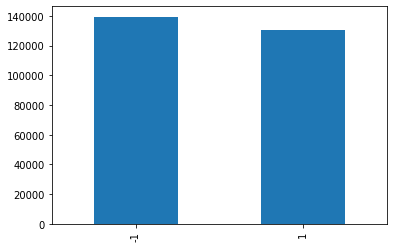

In [10]:
count_message = df_message['Direction'].value_counts().sort_index()
count_message.plot(kind='bar')


## **准备训练数据**

In [11]:
def P_Lagged_data(X, p):
  """ 计算p阶滞后项 """
  n = X.shape[0]
  LaggedX = np.zeros([n-p, p, X.shape[1]])
  for i in range(n-p):
    LaggedX[i,:,:] = X[i:(i+p),:]
  return LaggedX

def GenerateLaggedValueInputOutput(df_orderbook, label, p):
  """ 准备训练需要的输入和输出数据 """
  orderbook = df_orderbook.values
  inputX = P_Lagged_data(orderbook, p) 
  outputY = label[p:]
  return inputX, outputY 

nTimes = df_orderbook.shape[0]
inputX, outputY = GenerateLaggedValueInputOutput(df_orderbook, label, p=50)

# 查看输入和输出的维度
print(inputX.shape)
print(outputY.shape)

(27507, 50, 40)
(27507, 2)


In [12]:
df_orderbook.shape

(27557, 40)

In [13]:
label

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

## **预处理限价委托单薄数据集中的数据**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# 划分训练集和测试集, 这里需要将参数shuffle设置为False, 因为我们希望使用前90%的数据作为训练集, 其他作为测试集.
# 参数shuffle的默认值是True, 默认情况下将会从整个数据集中随机选择测试集数据.
X_train, X_test, y_train, y_test = train_test_split(inputX, outputY, test_size=0.1, shuffle = False)

def Normalize3D_tensor_Data(X_train, X_test):
  """ 标准化三维张量输入数据 """
  dim_train = np.shape(X_train)
  print(dim_train)
  X_train_scaled = np.zeros(np.shape(X_train), dtype = float)
  X_test_scaled = np.zeros(np.shape(X_test), dtype = float)
  for i in range(dim_train[1]):
    scaler = preprocessing.StandardScaler().fit(X_train[:, i, :])
    X_train_scaled[:, i, :] = scaler.transform(X_train[:, i, :])  
    X_test_scaled[:, i, :] = scaler.transform(X_test[:, i, :])  
  return X_train_scaled, X_test_scaled
 
X_train_scaled, X_test_scaled = Normalize3D_tensor_Data(X_train, X_test)

(24756, 50, 40)


## 使用LSTM预测价格变动方向

In [15]:
# import tensorflow + keras ...
import tensorflow as tf
import keras
from tensorflow.keras.layers import Dense, LSTM, Dropout, Activation
from tensorflow.keras import optimizers,metrics
from tensorflow.keras.models import Sequential

# import matplotlib...
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import matplotlib
import pylab

### **单层LSTM**

In [16]:
def LSTM_Single_Layer(input_shape, nodes, dropout):
    """ 使用单层LSTM构建循环神经网络 """
    model = Sequential()
    model.add(LSTM(nodes,dropout=dropout,input_shape= input_shape,use_bias= True))
    model.add(Dense(10, activation='relu', use_bias= True))
    model.add(Dense(2,activation='softmax', use_bias= True))
    adam = optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=[metrics.categorical_accuracy])
    return model

LightLSTM_Model = LSTM_Single_Layer(X_train_scaled.shape[1:], 30,0.15)

# 查看LSTM的模型参数
print(LightLSTM_Model.summary())
hist_LightLSTM = LightLSTM_Model.fit(X_train_scaled, y_train,validation_split=0.1, batch_size=2000, epochs=50, shuffle=True, verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30)                8520      
_________________________________________________________________
dense (Dense)                (None, 10)                310       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
Total params: 8,852
Trainable params: 8,852
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
12/12 [==============================] - 8s 83ms/step - loss: 0.6935 - categorical_accuracy: 0.5116 - val_loss: 0.6864 - val_categorical_accuracy: 0.5448
Epoch 2/50
12/12 [==============================] - 0s 31ms/step - loss: 0.6882 - categorical_accuracy: 0.5344 - val_loss: 0.6763 - val_categorical_accuracy: 0.5739
Epoch 3/50
12/12 [==============================]

In [17]:
X_train.shape[1:]

(50, 40)

In [18]:
score_LightLSTM = LightLSTM_Model.evaluate(X_test_scaled, y_test, verbose=1)
print(score_LightLSTM)

86/86 [==============================] - 1s 6ms/step - loss: 0.7298 - categorical_accuracy: 0.5736
[0.7297797203063965, 0.5736095905303955]


In [21]:
LightLSTM_Model.save('LightLSTM_Model')

from keras.models import load_model

LightLSTM_Model = load_model('LightLSTM_Model')
hist_LightLSTM = LightLSTM_Model.fit(X_train_scaled , y_train, validation_split=0.1, batch_size=2000, epochs=50, shuffle=True, verbose=1)

INFO:tensorflow:Assets written to: LightLSTM_Model/assets


INFO:tensorflow:Assets written to: LightLSTM_Model/assets


Epoch 1/50
12/12 [==============================] - 3s 80ms/step - loss: 0.5916 - categorical_accuracy: 0.6645 - val_loss: 0.6934 - val_categorical_accuracy: 0.5844
Epoch 2/50
12/12 [==============================] - 0s 35ms/step - loss: 0.5851 - categorical_accuracy: 0.6713 - val_loss: 0.6899 - val_categorical_accuracy: 0.5949
Epoch 3/50
12/12 [==============================] - 0s 30ms/step - loss: 0.5823 - categorical_accuracy: 0.6715 - val_loss: 0.7181 - val_categorical_accuracy: 0.5828
Epoch 4/50
12/12 [==============================] - 0s 29ms/step - loss: 0.5808 - categorical_accuracy: 0.6759 - val_loss: 0.6907 - val_categorical_accuracy: 0.5654
Epoch 5/50
12/12 [==============================] - 0s 28ms/step - loss: 0.5813 - categorical_accuracy: 0.6730 - val_loss: 0.6946 - val_categorical_accuracy: 0.5214
Epoch 6/50
12/12 [==============================] - 0s 29ms/step - loss: 0.5829 - categorical_accuracy: 0.6714 - val_loss: 0.7128 - val_categorical_accuracy: 0.5788
Epoch 7/50

In [22]:
from matplotlib import pyplot as plt    

def plot_hist_loss(hist):
  plt.figure()
  plt.plot(hist.history['loss'], 'b', linewidth=1.5)
  plt.plot(hist.history['val_loss'], 'r', linewidth=1.5)
  plt.legend(['Training set','Testing set'])
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  
def plot_hist_accuracy(hist):
  plt.figure()
  plt.plot(hist.history['categorical_accuracy'], 'b', linewidth = 1.5)
  plt.plot(hist.history['val_categorical_accuracy'], 'r', linewidth = 1.5)
  plt.legend(['Training set','Testing set'])
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')

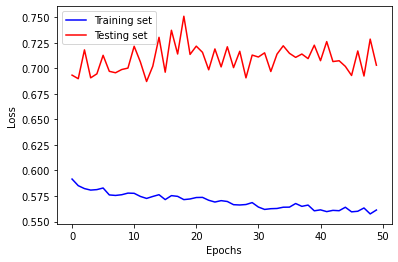

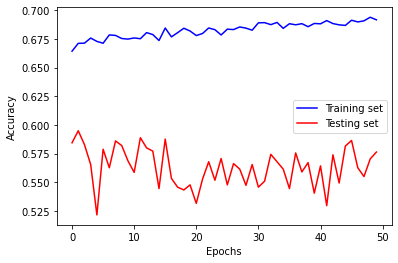

In [23]:
plot_hist_loss(hist_LightLSTM)
plot_hist_accuracy(hist_LightLSTM)

### Cross validation

In [24]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

estimator = KerasClassifier(build_fn=LSTM_Single_Layer, nodes = 50, epochs=20, batch_size=200, input_shape =X_train_scaled.shape[1:], dropout = 0.1, verbose=1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(estimator, X_train, y_train[:,0], cv=kfold, scoring='accuracy')
print(np.shape(y_train[:, 0]))
print('Cross Validation: Accuracy')
print("%.2f%% (+/- %.2f%%)" % (results.mean(), results.std()))

Epoch 1/20
100/100 [==============================] - 3s 15ms/step - loss: 0.6967 - categorical_accuracy: 0.5052
Epoch 2/20
100/100 [==============================] - 2s 15ms/step - loss: 0.6931 - categorical_accuracy: 0.5042
Epoch 3/20
100/100 [==============================] - 2s 15ms/step - loss: 0.6933 - categorical_accuracy: 0.4992
Epoch 4/20
100/100 [==============================] - 2s 15ms/step - loss: 0.6934 - categorical_accuracy: 0.5034
Epoch 5/20
100/100 [==============================] - 2s 15ms/step - loss: 0.6932 - categorical_accuracy: 0.5023
Epoch 6/20
100/100 [==============================] - 2s 15ms/step - loss: 0.6932 - categorical_accuracy: 0.4971
Epoch 7/20
100/100 [==============================] - 2s 15ms/step - loss: 0.6931 - categorical_accuracy: 0.5026
Epoch 8/20
100/100 [==============================] - 2s 15ms/step - loss: 0.6934 - categorical_accuracy: 0.4985
Epoch 9/20
100/100 [==============================] - 2s 15ms/step - loss: 0.6930 - categorical_

### **Parameter tuning**

In [25]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# grid search epochs, batch size and optimizer
epochs = [5]
n_hidden_neurons = [10, 50]
batch_size = [128, 256]
dropout = [0, 0.1]
input_shape = [X_train_scaled.shape[1:]]
param_grid = dict( nodes = n_hidden_neurons, batch_size = batch_size, epochs = epochs, input_shape =input_shape, dropout= dropout )
estimator = KerasClassifier(build_fn=LSTM_Single_Layer,  verbose=1)
grid = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring = 'accuracy', cv =3)
grid_result = grid.fit(X_train_scaled, y_train[:,0])

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/5
129/129 [==============================] - 3s 12ms/step - loss: 0.6893 - categorical_accuracy: 0.5348
Epoch 2/5
129/129 [==============================] - 1s 11ms/step - loss: 0.6822 - categorical_accuracy: 0.5623
Epoch 3/5
129/129 [==============================] - 1s 11ms/step - loss: 0.6767 - categorical_accuracy: 0.5773
Epoch 4/5
129/129 [==============================] - 1s 11ms/step - loss: 0.6708 - categorical_accuracy: 0.5855
Epoch 5/5
129/129 [==============================] - 1s 11ms/step - loss: 0.6636 - categorical_accuracy: 0.5969
Epoch 1/5
129/129 [==============================] - 3s 11ms/step - loss: 0.6920 - categorical_accuracy: 0.5195
Epoch 2/5
129/129 [==============================] - 1s 11ms/step - loss: 0.6852 - categorical_accuracy: 0.5442
Epoch 3/5
129/129 [==============================] - 1s 11ms/step - loss: 0.6833 - categorical_accuracy: 0.5543
Epoch 4/5
129/129 [==============================] - 1s 11ms/step - loss: 0.6807 - categorical_accuracy:

### **三层LSTM**

In [26]:
def LSTM_Three_Layers(input_shape, nodes,rec_dropout,dropout):
    """ 使用三层LSTM构建循环神经网络 """
    model=Sequential()
    # 添加三层LSTM
    model.add(LSTM(nodes, return_sequences=True, recurrent_dropout=rec_dropout, dropout=dropout, input_shape=input_shape, use_bias= True))
    model.add(LSTM(nodes, return_sequences=True, recurrent_dropout=rec_dropout, dropout=dropout, use_bias= True))
    model.add(LSTM(nodes, recurrent_dropout=rec_dropout, dropout=dropout, use_bias= True))
    model.add(Dense(50, activation='relu', use_bias= True))
    model.add(Dense(2,activation='softmax'))
    adam = optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=[metrics.categorical_accuracy])
    return(model)
  
MultiLSTM_Model = LSTM_Three_Layers(X_train_scaled.shape[1:], 30, 0.25, 0.2)
print(MultiLSTM_Model.summary())
hist_MultiLSTM = MultiLSTM_Model.fit(X_train_scaled, y_train, validation_split=0.1, batch_size=2000, epochs=50, shuffle=True, verbose=1)

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_31 (LSTM)               (None, 50, 30)            8520      
_________________________________________________________________
lstm_32 (LSTM)               (None, 50, 30)            7320      
_________________________________________________________________
lstm_33 (LSTM)               (None, 30)                7320      
_________________________________________________________________
dense_62 (Dense)             (None, 50)                1550      
_________________________________________________________________
dense_63 (Dense)             (None, 2)                 102       
Total params: 24,812
Trainable params: 24,812
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
12/12 [==============================] - 21s 1s/step - loss: 0.6935 - categorical_accuracy: 0.5109 

In [27]:
score_MultiLSTM = MultiLSTM_Model.evaluate(X_test_scaled, y_test, verbose=1)
print(score_MultiLSTM)

86/86 [==============================] - 5s 59ms/step - loss: 0.7368 - categorical_accuracy: 0.5013
[0.7368391752243042, 0.5012722611427307]


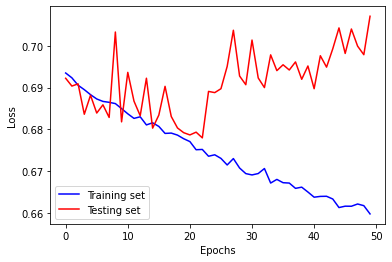

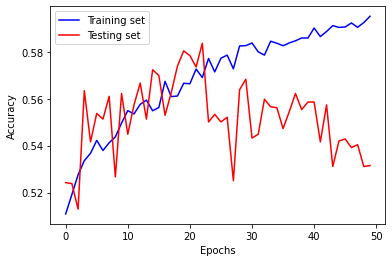

In [28]:
plot_hist_loss(hist_MultiLSTM)
plot_hist_accuracy(hist_MultiLSTM)